/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


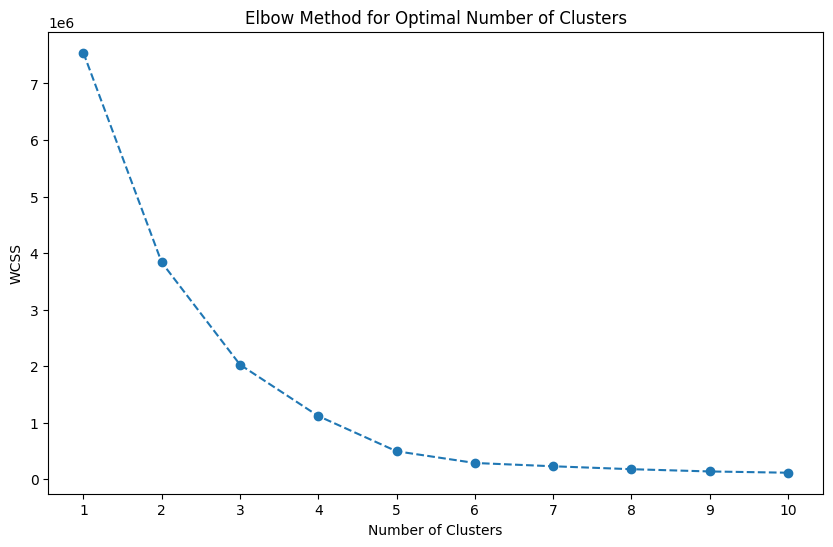

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'text_data_vectorized' is your vectorized text data from previous steps

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(text_data_vectorized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

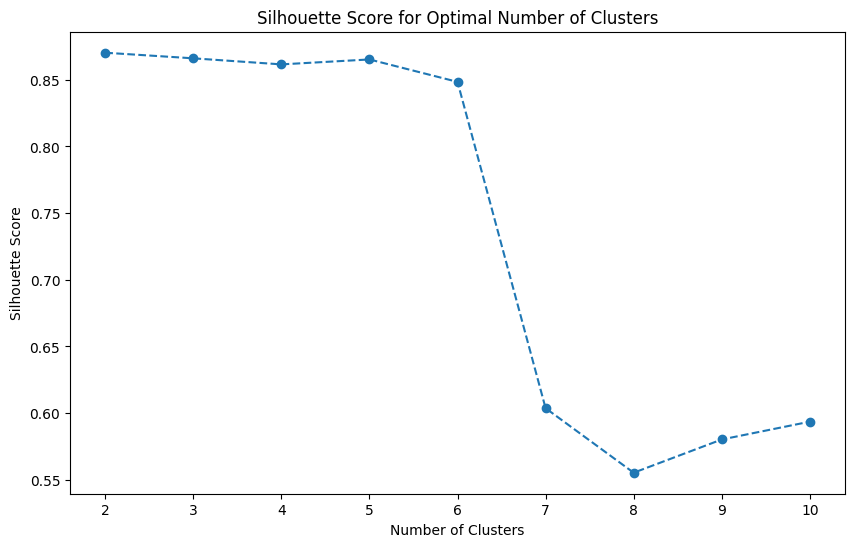

In [6]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(text_data_vectorized)
    silhouette_avg = silhouette_score(text_data_vectorized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()


In [3]:
!pip install PyMuPDF


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 37.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


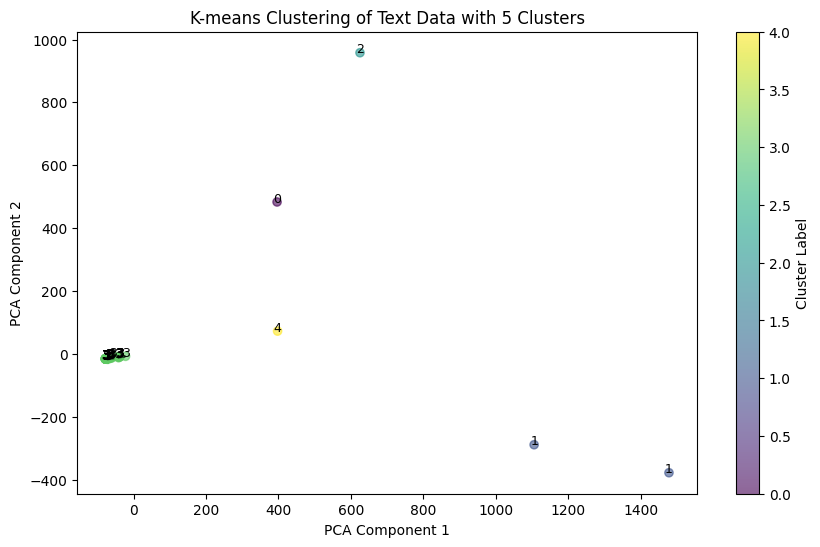


Cluster 0:
Grade 3 Grammar PRACTICE BOOK 1VCMJTIFECZ.BDNJMMBO.D(SBX)JMM PG.D(SBX)JMM&EVDBUJPO BEJWJTJPOPG5IF.D(SBX)JMM$PNQBOJFT *OD  5XP1FOO1MB[B /FX:PSL /FX:PSL $PQZSJHIUªCZ.B

Cluster 1:
Homework Practice and Problem-Solving Practice Workbook Contents Include: • 117 Homework Practice worksheets- one for each lesson • 117 Problem-Solving Practice worksheets- one for each lesson to appl
 Reteach and Skills Practice ii Copyright © by the McGraw-Hill Companies, Inc. All rights reserved. Except as permitted under the United States Copyright Act, no part of this publication may be reprod

Cluster 2:
Grade 3 Spelling PRACTICE BOOK 1VCMJTIFECZ.BDNJMMBO.D(SBX)JMM PG.D(SBX)JMM&EVDBUJPO BEJWJTJPOPG5IF.D(SBX)JMM$PNQBOJFT *OD  5XP1FOO1MB[B /FX:PSL /FX:PSL $PQZSJHIUªCZ.

Cluster 3:
 Contents Life Science Chapter 1 Adaptations in Land Environments . . . . . . . . . . . . . . . . . . . . . . 1 Chapter 2 Adaptations in Water Envir

In [9]:
# Required Imports
import fitz
import re
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy.spatial import ConvexHull

# Directory containing PDFs
pdf_directory = '/content/drive/MyDrive/CapstoneData'

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    pdf_document = fitz.open(pdf_path)
    text_data = []
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        text = page.get_text()
        text_data.append(text)
    full_text = "\n".join(text_data)
    return full_text

# Function to preprocess the extracted text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)
    chapters = text.split('CHAPTER')
    return chapters

# Extract and preprocess text from all PDFs
preprocessed_text = []
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        full_text = extract_text_from_pdf(pdf_path)
        preprocessed_text.extend(preprocess_text(full_text))

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
text_data_vectorized = vectorizer.fit_transform(preprocessed_text)

# Fit K-means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(text_data_vectorized)

# Predict cluster labels for each text
cluster_labels = kmeans.predict(text_data_vectorized)

# Reduce dimensionality for visualization (using PCA)
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(text_data_vectorized.toarray())

# Plot the clusters with labels and convex hulls
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.6)
plt.title('K-means Clustering of Text Data with 5 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add convex hulls to the plot
for i in range(5):  # Adjust number of clusters to 5
    points = reduced_data[cluster_labels == i]
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        hull_points = np.append(hull.vertices, hull.vertices[0])
        plt.plot(points[hull_points, 0], points[hull_points, 1], 'k--', alpha=0.6)

# Add cluster labels
for i in range(reduced_data.shape[0]):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], str(cluster_labels[i]), fontsize=9, ha='center')

# Add colorbar
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# Optional: Print some example texts from each cluster
for i in range(5):  # Adjust number of clusters to 5
    print(f"\nCluster {i}:")
    cluster_texts = [preprocessed_text[j] for j in range(len(preprocessed_text)) if cluster_labels[j] == i]
    for text in cluster_texts[:3]:  # Print first 3 texts in the cluster
        print(text[:200])  # Print first 200 characters of each text

# Optional: Get top terms for each cluster
def get_top_terms_per_cluster(tfidf_matrix, cluster_labels, terms, num_clusters, num_terms=10):
    top_terms = []
    for i in range(num_clusters):
        cluster_docs = np.where(cluster_labels == i)
        cluster_tfidf = np.sum(tfidf_matrix[cluster_docs], axis=0)
        top_terms_indices = np.argsort(cluster_tfidf).flatten()[-num_terms:]
        top_terms.append([terms[index] for index in top_terms_indices[::-1]])
    return top_terms

terms = vectorizer.get_feature_names_out()
top_terms = get_top_terms_per_cluster(text_data_vectorized, cluster_labels, terms, num_clusters=9)

for i, term_list in enumerate(top_terms):
    term_list_str = [str(term) for term in term_list]
    print(f"\nCluster {i} top terms: {', '.join(term_list_str)}")
